# Using LSTM to predict NVDA prices

Using LSTM:
- Maintains an internal state, allowing it to have memory of previous inputs

1.	Handling Sequential Data: LSTM (Long Short-Term Memory) networks are specifically designed to handle and predict sequences of data, making them well-suited for time series forecasting like stock prices.
2.	Capturing Long-Term Dependencies: LSTM networks can remember information for long periods, thanks to their ability to maintain a memory cell that updates and forgets information over time. This is crucial for stock price prediction, where historical data can influence future values.

In [1]:
# importing libraries

import pandas as pd # data visualization
import numpy as np # number manipulation
from sklearn.preprocessing import MinMaxScaler # helps to normalize data
from keras.models import Sequential # allows you to build a NN in a sequential stack
from keras.layers import LSTM, Dense # to define the neural network being used + hidden layers

# note that need to pip install tensorflow - keras is built on tensorflow

In [72]:
# load data

data = pd.read_csv('./NVDA.csv')
print(data.head())  # Check the first few rows of the data
data = data[['Date', 'Close']] # keeps only the date and close columns
print(data.head()) # Check the first few rows of the data
data['Date'] = pd.to_datetime(data['Date']) # converts the date column to datetime
data.set_index('Date', inplace=True) # sets the date column as the index

# pre-process data

scaler = MinMaxScaler(feature_range=(0, 1)) # defines the scaler object used to normalise the data
scaled_data = scaler.fit_transform(data) # normalises data using MinMaxScaler -> reminder that range of data fed into a RNN should ideally be 0 to 1

sequence_length = 60 # define input size
X, y = [], [] # X = input data, y = labels
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0]) # X contains groups of 60 data points
    y.append(scaled_data[i, 0]) # y contains the data point right at the end of the 60 points in X 
X, y = np.array(X), np.array(y) # puts X and y into numpy arrays so that they can be reshaped to be fed into the RNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # X.shape -> (number_of_samples, sequence_length) This reshapes X to the format needed for an input for keras

print(X) # X is an array of arrays of 60 closing prices
print(y) # Y is an array of the closing prices of the last day of each of the corresponding arrays in X

split = int(len(X) * 0.8) # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(y_test)

         Date       Open       High        Low      Close  Adj Close  \
0  2023-06-20  42.998001  43.990002  42.674000  43.807999  43.794888   
1  2023-06-21  43.500999  43.615002  42.080002  43.044998  43.032112   
2  2023-06-22  42.252998  43.425999  42.234001  43.025002  43.012127   
3  2023-06-23  42.464001  42.808998  42.014999  42.209000  42.196365   
4  2023-06-26  42.460999  42.764000  40.099998  40.632000  40.619839   

      Volume  
0  451153000  
1  551603000  
2  417737000  
3  358140000  
4  594322000  
         Date      Close
0  2023-06-20  43.807999
1  2023-06-21  43.044998
2  2023-06-22  43.025002
3  2023-06-23  42.209000
4  2023-06-26  40.632000
[[[0.03655488]
  [0.02854471]
  [0.02833479]
  ...
  [0.0509375 ]
  [0.04770402]
  [0.05416046]]

 [[0.02854471]
  [0.02833479]
  [0.0197682 ]
  ...
  [0.04770402]
  [0.05416046]
  [0.0551683 ]]

 [[0.02833479]
  [0.0197682 ]
  [0.00321246]
  ...
  [0.05416046]
  [0.0551683 ]
  [0.03752075]]

 ...

 [[0.52539527]
  [0.5365548

In [73]:
# initial model
'''
# Shape: (number_of_samples, sequence_length, no. of features)

# Build LSTM model
model = Sequential()
# input: (batch_size, 60, 1)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # X_train.shape[1] = 60, the second value in the tuple is the number of features which in this case is 1, the closing price
# return_sequence=True: first LSTM layer passes all hidden states to the next LSTM layer eg
# Output = [
#  [
#   [h1_t1, h2_t1, ..., h50_t1],  # 50-dimensional vector at time step 1 for the first sample
#    [h1_t2, h2_t2, ..., h50_t2],  # 50-dimensional vector at time step 2 for the first sample
#    [h1_t3, h2_t3, ..., h50_t3],  # 50-dimensional vector at time step 3 for the first sample
#    [h1_t4, h2_t4, ..., h50_t4]   # 50-dimensional vector at time step 4 for the first sample
#    .. 60 time steps
#  ] .. (depending on the batch size)
# ]

# note that each neuron takes a set of 60 data points, each neuron has a diff weight

# input: (batch_size, 60, 50)
model.add(LSTM(units=50, return_sequences=False)) 
# return_sequence=False: 2nd LSTM layer only returns the FINAL hidden state to the next two layers
# [ h1_t60, 
#  h2_t60, 
#  ... ] 

# output: (batch_size, 50)

# The two LSTM layers help to capture the temporal dependencies in the data

# input: (batch_size, 50)

model.add(Dense(units=25)) # each of the 25 neurons has a weight for each of the 50 neurons in the previous layer
model.add(Dense(units=1)) # the single neuron has a weight for each of the 25 neurons in the previous layer

model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(X_train, y_train, batch_size=1, epochs=10)
'''

Epoch 1/10
153/153 [==============================] - 3s 11ms/step - loss: 0.0036
Epoch 2/10
153/153 [==============================] - 2s 11ms/step - loss: 0.0030
Epoch 3/10
153/153 [==============================] - 2s 11ms/step - loss: 0.0016
Epoch 4/10
153/153 [==============================] - 2s 11ms/step - loss: 0.0013
Epoch 5/10
153/153 [==============================] - 2s 11ms/step - loss: 0.0016
Epoch 6/10
153/153 [==============================] - 2s 11ms/step - loss: 0.0012
Epoch 7/10
153/153 [==============================] - 2s 11ms/step - loss: 9.1089e-04
Epoch 8/10
153/153 [==============================] - 2s 11ms/step - loss: 8.2668e-04
Epoch 9/10
153/153 [==============================] - 2s 11ms/step - loss: 9.8055e-04
Epoch 10/10
153/153 [==============================] - 2s 11ms/step - loss: 9.3393e-04


## Choice for optimizer and loss function

adam:
1.	Adaptive Learning Rate: Adjusts the learning rate for each parameter dynamically, combining the benefits of AdaGrad and RMSProp.
2.	Efficiency: Requires little memory and is computationally efficient, making it suitable for large datasets and high-dimensional parameter spaces.

mse:
1. Standard loss function for regression, measuring the average squared difference between actual and predicted values.

In [90]:
# TODO: understand this whole code block that uses hypermodel

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    
    # Tuning number of units in the first LSTM layer
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], 1)))
    
    # Adding dropout to prevent overfitting
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Tuning number of units in the second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), 
                   return_sequences=False))
    
    # Adding dropout to prevent overfitting
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Tuning number of units in the Dense layer
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=256, step=32)))
    
    # Output layer
    model.add(Dense(units=1))
    
    # Compiling the model
    model.compile(optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='LOG')), 
                  loss='mean_squared_error')
    
    return model

# Initialize RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='hyperparam_tuning',
    project_name='lstm_stock_prediction'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first LSTM layer is {best_hps.get('units_1')} and in the second LSTM layer is {best_hps.get('units_2')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rates are {best_hps.get('dropout_1')} and {best_hps.get('dropout_2')}.
The optimal learning rate for the optimizer is {best_hps.get('lr')}.
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Trial 10 Complete [00h 00m 05s]
val_loss: 0.0015049218200147152

Best val_loss So Far: 0.0015049218200147152
Total elapsed time: 00h 01m 38s

The optimal number of units in the first LSTM layer is 96 and in the second LSTM layer is 32.
The optimal number of units in the dense layer is 32.
The optimal dropout rates are 0.0 and 0.2.
The optimal learning rate for the optimizer is 0.006118848282897796.



Epoch 1/50
4/4 [==============================] - 2s 185ms/step - loss: 0.0221 - val_loss: 0.0555
Epoch 2/50
4/4 [==============================] - 0s 56ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 3/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0036 - val_loss: 0.0730
Epoch 4/50
4/4 [==============================] - 0s 57ms/step - loss: 0.0032 - val_loss: 0.0058
Epoch 5/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0018 - val_loss: 0.0179
Epoch 6/50
4/4 [==============================] - 0s 63ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 7/50
4/4 [==============================] - 0s 63ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 9/50
4/4 [==============================] - 0s 65ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 10/50
4/4 [==============================] - 0s 61ms/step - loss: 9.1915e-04 - val_loss: 0.0013
Epoch 11/50
4/4 [=======

In [91]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # inverse normalisation
print(predictions)

# Unnormalize y_test
y_test = y_test.reshape(-1, 1)  # Reshape to 2D array
y_test = scaler.inverse_transform(y_test)  # Inverse normalization


2/2 [==============================] - 0s 7ms/step
[[ 88.77449 ]
 [ 87.50321 ]
 [ 87.19789 ]
 [ 88.4516  ]
 [ 90.56834 ]
 [ 92.66383 ]
 [ 93.80986 ]
 [ 94.49784 ]
 [ 95.20018 ]
 [ 96.32251 ]
 [ 97.31367 ]
 [ 98.03565 ]
 [ 98.20518 ]
 [ 98.15287 ]
 [ 98.06132 ]
 [ 98.13728 ]
 [ 98.85648 ]
 [ 99.89229 ]
 [100.70759 ]
 [101.598854]
 [102.503624]
 [103.22087 ]
 [105.04023 ]
 [107.7309  ]
 [111.66186 ]
 [115.90004 ]
 [119.06498 ]
 [120.92949 ]
 [122.40426 ]
 [123.63963 ]
 [125.40125 ]
 [127.116295]
 [128.59337 ]
 [129.86478 ]
 [130.75122 ]
 [131.85779 ]
 [133.55463 ]
 [135.71268 ]
 [137.77414 ]]


In [92]:
# Ensure y_test has the same shape as predictions
print("y_test (unnormalized):", y_test)  # Actual closing prices
print("Shape of predictions:", predictions.shape)
print("Shape of y_test:", y_test.shape)

rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f'RMSE: {rmse}')

y_test (unnormalized): [[ 7629.87930786]
 [ 7911.35507428]
 [ 8397.43596072]
 [ 8399.53183453]
 [ 8270.4622808 ]
 [ 7950.31358008]
 [ 8214.73878489]
 [ 8497.83367883]
 [ 8817.02964903]
 [ 8665.95699236]
 [ 8652.43111459]
 [ 8493.833106  ]
 [ 8601.56500125]
 [ 8651.19271731]
 [ 8742.35089247]
 [ 9054.2119235 ]
 [ 9028.39846997]
 [ 8849.32046994]
 [ 9068.50021431]
 [ 9126.22442528]
 [ 9084.69320414]
 [ 9927.59653461]
 [10181.92452945]
 [10889.85217706]
 [10977.86649389]
 [10565.893221  ]
 [10483.30828703]
 [10994.53623   ]
 [11131.41584986]
 [11703.22619539]
 [11565.86982925]
 [11555.39179378]
 [11641.31099883]
 [11557.48776284]
 [11966.12676464]
 [12386.19729447]
 [12602.42426003]
 [12516.69480094]
 [12954.86378167]]
Shape of predictions: (39, 1)
Shape of y_test: (39, 1)
RMSE: 9902.461645594798


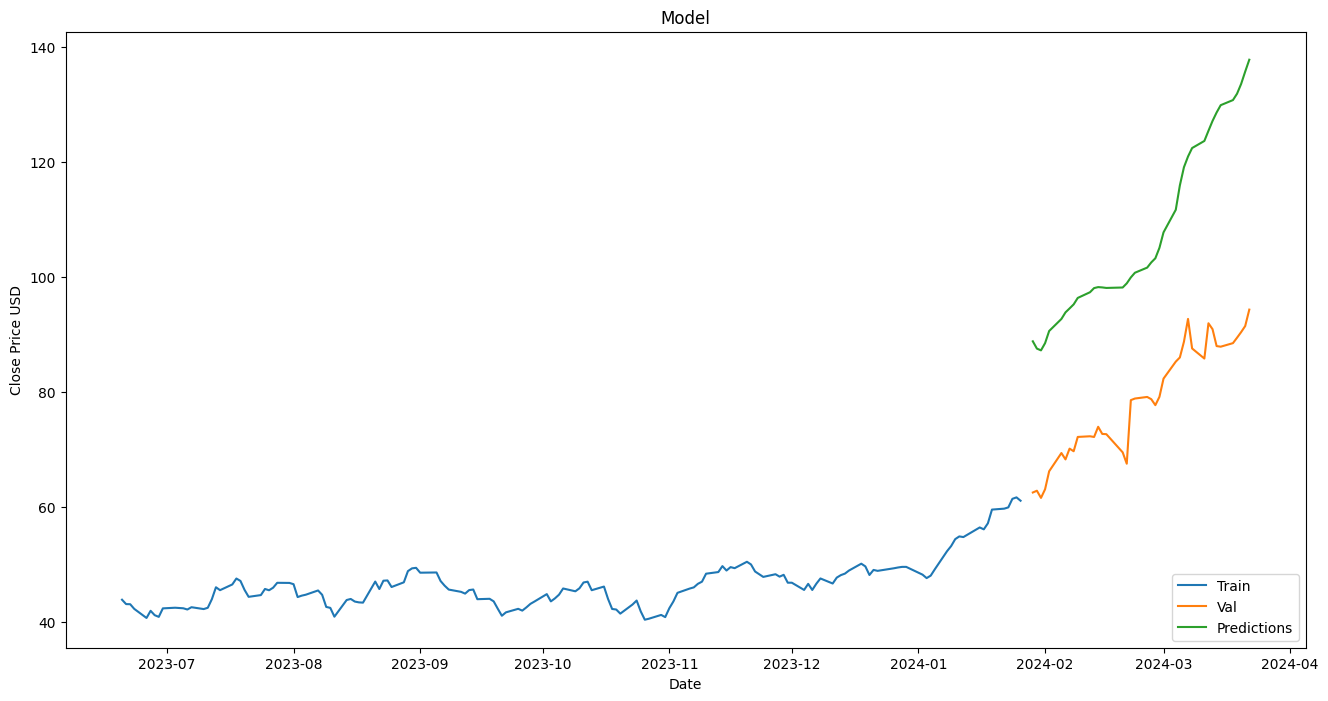

In [93]:
# Visualize predictions
import matplotlib.pyplot as plt

# Assuming data is the original DataFrame with Date and Close columns
train = data[:split]
valid = data[split:]

# Ensure predictions have the same length as valid
valid = valid.iloc[:len(predictions)].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()